# Uber Trips Data Analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
# Check if there are any null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
# Change the null values to "General"
dataset['PURPOSE'].fillna("General", inplace=True)
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,General
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Data Preprocessing

In [5]:
# Changing the START_DATE and END_DATE to the date_time format
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
                                     errors='coerce')

In [6]:
from datetime import datetime

# Splitting the START_DATE to date and time column 
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

# Splitting the time into Morning, Afternoon, Evening, Night
dataset['day-night'] = pd.cut(x=dataset['time'], bins = [0,10,15,19,24], 
                              labels = ['Morning','Afternoon','Evening','Night'])


In [7]:
# Check if there are any null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
 7   date        1155 non-null   object        
 8   time        1155 non-null   float64       
 9   day-night   1136 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 82.7+ KB


In [8]:
# Dop rows with duplicates and null values
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1135 non-null   datetime64[ns]
 1   END_DATE    1135 non-null   datetime64[ns]
 2   CATEGORY    1135 non-null   object        
 3   START       1135 non-null   object        
 4   STOP        1135 non-null   object        
 5   MILES       1135 non-null   float64       
 6   PURPOSE     1135 non-null   object        
 7   date        1135 non-null   object        
 8   time        1135 non-null   float64       
 9   day-night   1135 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 90.0+ KB


### Data Visualization

In [9]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
unique_values


{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'General'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

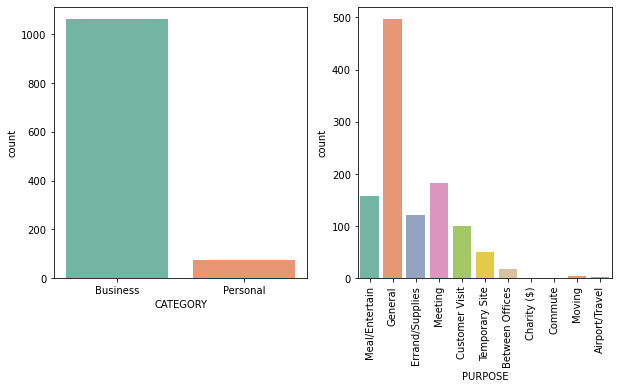

In [23]:
# Countplot the CATEGORY and PURPOSE columns.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = dataset["CATEGORY"], palette = "Set2")

plt.subplot(1,2,2)
sns.countplot(x = dataset["PURPOSE"], palette = "Set2")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='day-night', ylabel='count'>

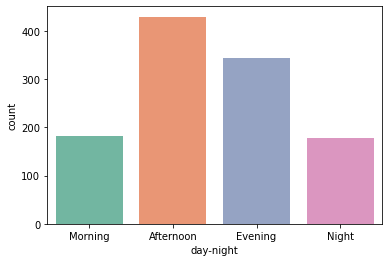

In [22]:
# Countplot the time into Morning, Afternoon, Evening, Night
sns.countplot(x = dataset["day-night"], palette = "Set2")

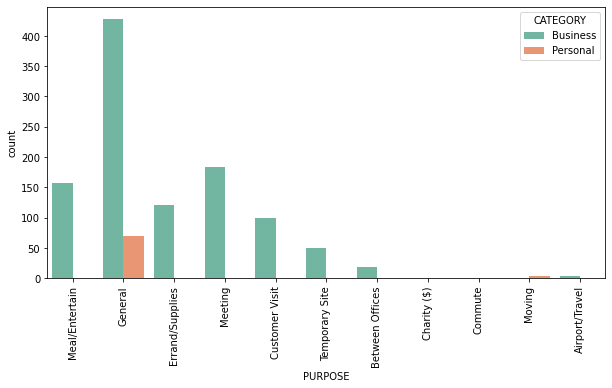

In [27]:
# Compare Business and personal categories with different PURPOSE 
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY', palette = "Set2")
plt.xticks(rotation=90)
plt.show()

### Conclusions from the plots above:
1. Most rides are reserved for business-related purposes.
2. The majority of people book uber for meetings and meal/entertainment.
3. Most of the ubers are booked between the hours of 10 a.m. and 5 p.m. (Afternoon).

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

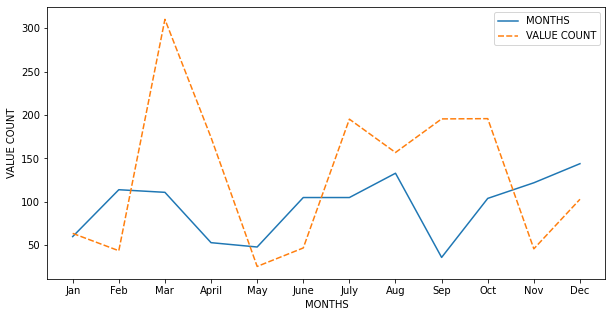

In [28]:
# Visualization for months data
# Lable the months 
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

month = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": month.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                    sort=False)['MILES'].max()})

plt.figure(figsize=(10, 5))
p = sns.lineplot(data = df)
p.set(xlabel = "MONTHS", ylabel = "VALUE COUNT")

### Conclusion from the plot above:

1. The counts are extremely inconsistent.
2. However, it is still obvious that the counts are much lower in November, December, and January.

Text(0, 0.5, 'DAYS COUNT')

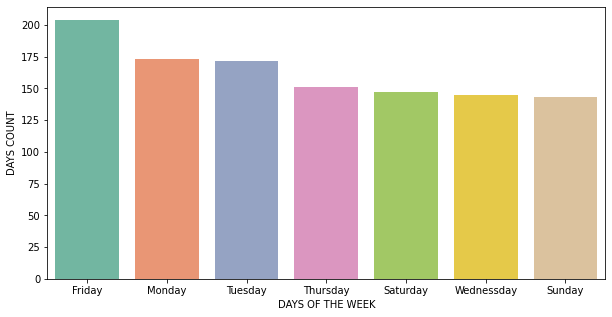

In [29]:
# Visualization for days data
# Lable the days of the week
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednessday', 3: 'Thursday', 
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
dataset['DAY'] = dataset['DAY'].map(day_label)

# Plot the days count
plt.figure(figsize=(10,5))
day_label = dataset.DAY.value_counts()
sns.barplot(x = day_label.index, y = day_label, palette = "Set2");
plt.xlabel('DAYS OF THE WEEK')
plt.ylabel('DAYS COUNT')

### Conclusion from the plot above:

1. The counts are much higher on Friday, Monday and Tuesday.
2. Weekends seems to be quite slow. 

<AxesSubplot:xlabel='MILES'>

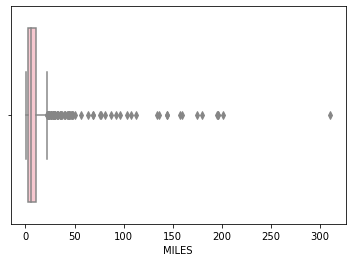

In [15]:
# Visualization for MILES Column
sns.boxplot(x = dataset['MILES'], color='pink')

<AxesSubplot:xlabel='MILES'>

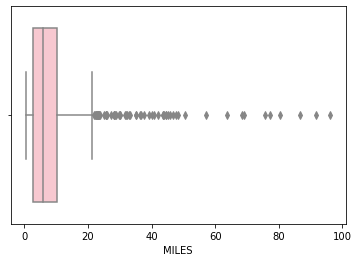

In [16]:
# Remove the outliers after 100 miles
sns.boxplot(x = dataset[dataset['MILES']<100]['MILES'], color='pink')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MILES', ylabel='Density'>

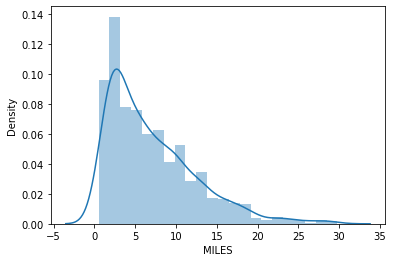

In [30]:
# From the plot above, we can see the max miles value is around 20 
# and min miles value is around 0.
sns.distplot(dataset[dataset['MILES']<30]['MILES'])

### Conclusion from the plot above:
1. Most of the uber booked for the distance of 4-5 miles.
2. Majorly people chooses uber for the distance of 0-20 miles.
3. For distance more than 20 miles uber counts is nearly negligible